In [1]:
# My custom library of photoelastic tools
import sys
sys.path.append('/home/jack/workspaces/jupyter-workspace/pepe/')

from pepe.preprocess import circularMask, crossMask, rectMask, mergeMasks, checkImageType
from pepe.simulate import genSyntheticResponse
from pepe.analysis import detectWallContacts

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 140

# For timing
import time

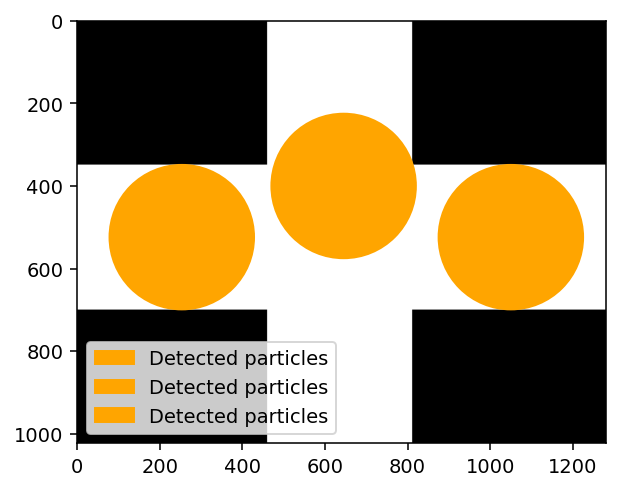

In [2]:
# Make some fake data with several potential wall contacts
fig, ax = plt.subplots()

imageShape = (1024, 1280, 3)

# Create a cross-shaped channel
maskArr = crossMask(imageShape, xlim=np.array([460, 810]), ylim=np.array([350, 700]))

# Now we'll add some extra boundary regions, and merge them with the cross mask
#listOfMasks = np.array([maskArr,
#                       rectMask(imageShape, corner=np.array([300,0]), dimensions=np.array([500, 75]))])
#maskArr = mergeMasks(listOfMasks, signs=np.array([1,-1], dtype=np.int16))

centers = np.array([[524, 253], [524, 1050], [400, 645]])
radii = np.array([175, 175, 175])

ax.imshow(maskArr*255)
for i in range(len(centers)):
    c = plt.Circle(centers[i][::-1], radii[i], label='Detected particles', color='orange')
    ax.add_artist(c)
ax.legend()
plt.show()

[-2.90604767286893, 2.90604767286893]
[-2.90604767286893, 2.90604767286893]


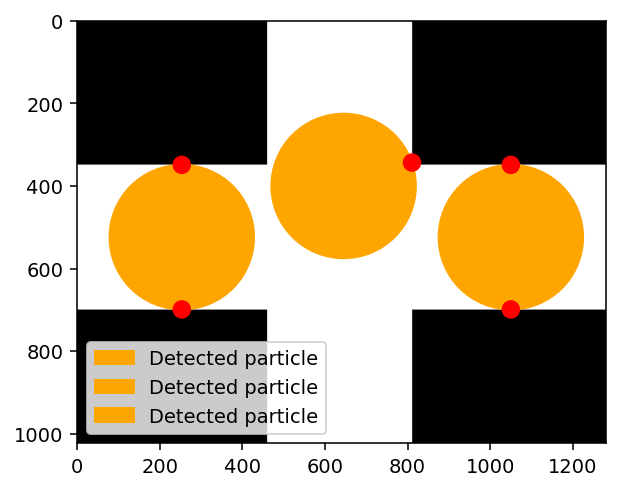

In [3]:
# Actual contact detection
numContacts, betaArr, g2AvgArr = detectWallContacts(centers, radii, maskArr, contactPadding=5)

# Draw on all of the found boundary contacts
fig, ax = plt.subplots()

ax.imshow(maskArr*255)

for i in range(len(centers)):
    # particle itself
    c = plt.Circle(centers[i][::-1], radii[i], label='Detected particle', color='orange')
    ax.add_artist(c)
    
    # Now add contacts
    for j in range(numContacts[i]):
        contactPoint = centers[i] + radii[i] * np.array([np.cos(betaArr[i][j]), np.sin(betaArr[i][j])])
        cc = plt.Circle(contactPoint[::-1], 20, color='red')
        ax.add_artist(cc)
ax.legend()
plt.show()

In [4]:
betaArr

[array([3.14159265, 0.        ]),
 array([3.14159265, 0.        ]),
 array([1.90003029])]